<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826312 sha256=13a37761d97bb976d835590cabbcfebbafe492530784bd10903eac480a690437
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437405 sha256=2bd9f6163f85faeadbea54f9c79cfec21fa8e1f2f692a47fe9d59cfa70f69a05
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [228]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-NEO", interval="minute15", count=430)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                        open     high      low    close        volume  \
2023-04-07 23:00:00  15950.0  15960.0  15910.0  15960.0   4985.917116   
2023-04-07 23:15:00  15960.0  15980.0  15940.0  15960.0   5570.236174   
2023-04-07 23:30:00  15970.0  15990.0  15940.0  15980.0   1589.916683   
2023-04-07 23:45:00  15980.0  16010.0  15970.0  15970.0   2564.585459   
2023-04-08 00:00:00  15970.0  16010.0  15970.0  16000.0   3352.699500   
...                      ...      ...      ...      ...           ...   
2023-04-12 09:15:00  16590.0  16650.0  16580.0  16650.0   8568.425053   
2023-04-12 09:30:00  16640.0  16650.0  16520.0  16520.0   8432.942738   
2023-04-12 09:45:00  16520.0  16520.0  16300.0  16370.0  39110.125275   
2023-04-12 10:00:00  16370.0  16370.0  16220.0  16290.0  32097.975770   
2023-04-12 10:15:00  16300.0  16370.0  16300.0  16340.0  10604.822504   

                            value  
2023-04-07 23:00:00  7.938644e+07  
2023-04-07 23:15:00  8.892996e+07  
2023-04-07 23:3

In [229]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-07 23:00:00,15960.0
1,2023-04-07 23:15:00,15960.0
2,2023-04-07 23:30:00,15980.0
3,2023-04-07 23:45:00,15970.0
4,2023-04-08 00:00:00,16000.0
...,...,...
425,2023-04-12 09:15:00,16650.0
426,2023-04-12 09:30:00,16520.0
427,2023-04-12 09:45:00,16370.0
428,2023-04-12 10:00:00,16290.0


In [230]:
#prophet 불러옴
from fbprophet import Prophet

In [231]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [236]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


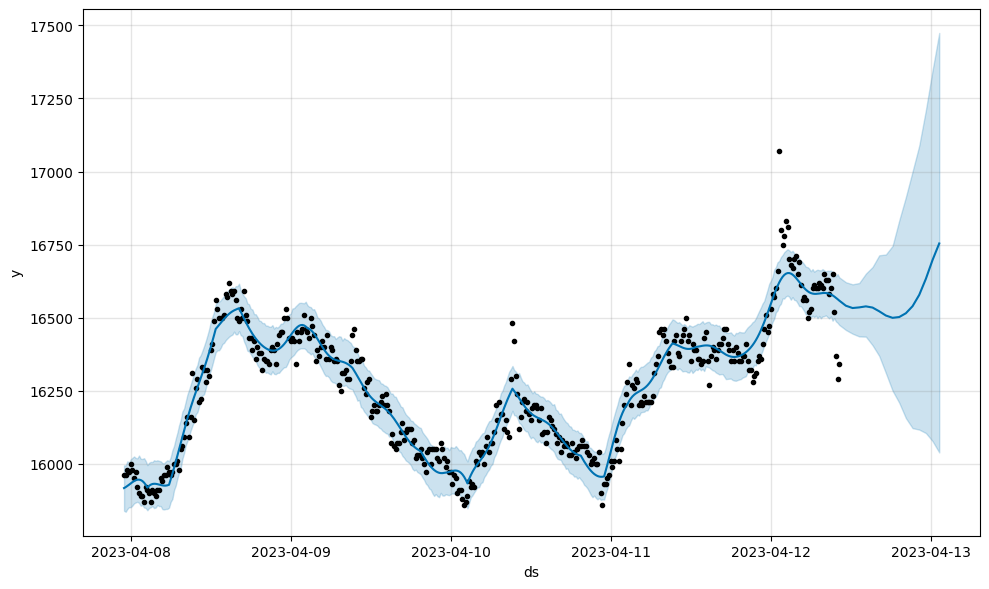

In [237]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


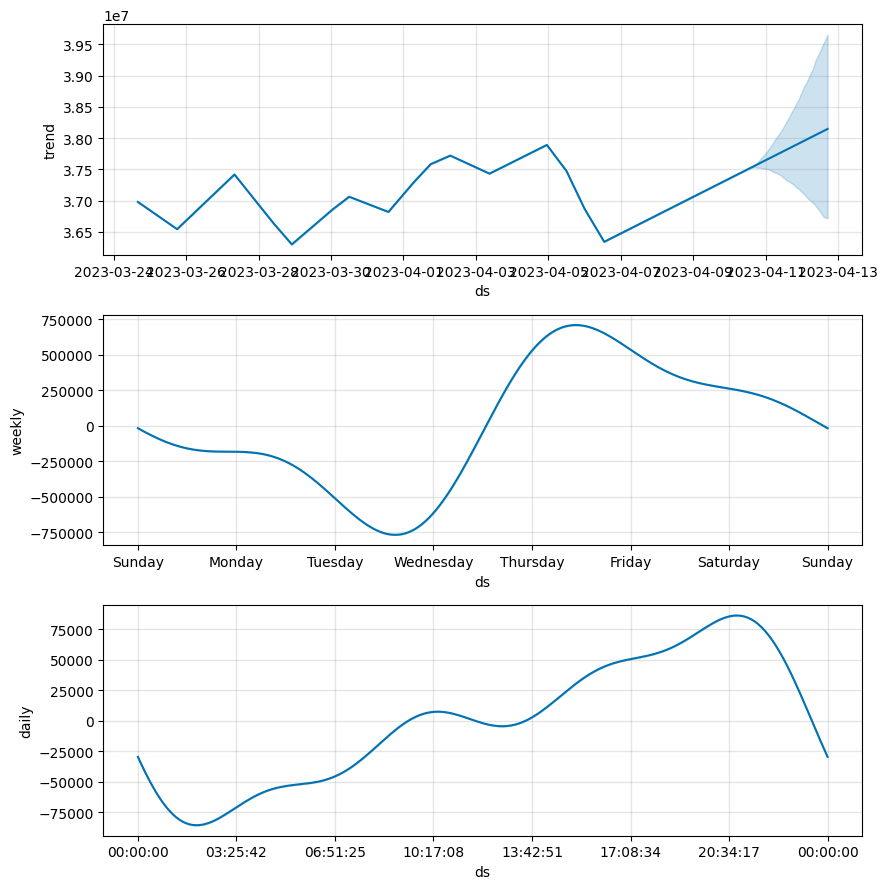

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)